In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import math
import operator

In [ ]:
pd.options.display.max_colwidth = 250

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sentences = []

for chapter in range(1, 19):

  # analyzing chapters in which number of verses match across translations
  if chapter==1 or chapter==2 or chapter==4 or chapter==6 or chapter==13 or chapter==14 or chapter==18:
    continue

  eknath_easwaran_chapter = pd.read_csv('/content/drive/MyDrive/sbg_miniproject/Processed Text Files/eknath easwaran/' + str(chapter) + '.csv')
  mahatma_gandhi_chapter = pd.read_csv('/content/drive/MyDrive/sbg_miniproject/Processed Text Files/mahatma gandhi/' + str(chapter) + '.csv')
  purohit_swami_chapter = pd.read_csv('/content/drive/MyDrive/sbg_miniproject/Processed Text Files/purohit swami/' + str(chapter) + '.csv')

  sentence1 = eknath_easwaran_chapter['verse'].tolist()
  sentence2 = mahatma_gandhi_chapter['verse'].tolist()
  sentence3 = purohit_swami_chapter['verse'].tolist()

  sentences.append(sentence1)
  sentences.append(sentence2)
  sentences.append(sentence3)

  # print('Chapter - ', str(chapter), ' ', len(eknath_easwaran_chapter))

sentence_new = []
for i in range(0, len(sentences)):
  for j in range(0, len(sentences[i])):
    sentence_new.append(sentences[i][j])

sentence_embeddings = model.encode(sentence_new)

In [ ]:
sentence_embeddings.shape

(1059, 768)

In [ ]:
df = pd.DataFrame(columns=['Chapter', 'Verse', 'Eknath Easwaran','Mahatma Gandhi','Shri Swami Purohit','Easwaran - Gandhi','Gandhi - Purohit','Purohit - Easwaran'])

In [ ]:
i = 0
j = 43
k = 86
verse = 1

for i in range(0, 43):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [3], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

# print(sentence_new[0])
# print(sentence_new[43])
# print(sentence_new[86])
# print('\n')

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
38,3,39,"hidden, Arjuna, by this unquenchable fire for self-satisfaction, the inveterate enemy of the wise.","Knowledge is obscured, O Arjuna, by this eternal enemy of the wise man, in the form of Lust, the insatiable fire.",It is the wise man’s constant enemy; it tarnishes the face of wisdom. It is as insatiable as a flame of fire.,0.824952,0.700971,0.602026
39,3,40,"Selfish desire is found in the senses, mind, and intellect, misleading them and burying the understanding in delusion.","The senses, the mind and the reason are said to be its great seat; by means of these it obscures knowledge and stupefies man.","It works through the senses, the mind and the reason; and with their help destroys wisdom and confounds the soul.",0.437966,0.492521,0.298986
40,3,41,"Fight with all your strength, Arjuna! Controlling your senses, conquer your enemy, the destroyer of knowledge and realization.","Therefore, O Arjuna, bridle you first the senses and then rid yourself of this sinner, the destroyer of knowledge and discrimination.","Therefore, O Arjuna, first control your senses and then slay desire, for it is full of sin, and is the destroyer of knowledge and of wisdom.",0.741466,0.705181,0.727638
41,3,42,"The senses are higher than the body, the mind higher than the senses; above the mind is the intellect, and above the intellect is the Atman.","Subtle, they say, are the senses; subtler than the senses is the mind; subtler than the mind is the reason; but subtler even than the reason is He.","It is said that the senses are powerful. But beyond the senses is the mind, beyond the mind is the intellect, and beyond and greater than intellect is He.",0.553931,0.597002,0.796068
42,3,43,"Thus, knowing that which is supreme, let the Atman rule the ego. Use your mighty arms to slay the fierce enemy that is selfish desire.","Thus realizing Him to be subtler than the reason, and controlling the self by the Self (Atman), destroy, O Arjuna, this enemy—Lust, so hard to overcome.","Thus, O Mighty-in-Arms, knowing Him to be beyond the intellect and, by His help, subduing your personal egotism, kill yours enemy, Desire, extremely difficult though it be.”",0.746193,0.578433,0.608734


In [ ]:
# print(sentence_new[129])
# print(sentence_new[158])
# print(sentence_new[187])
# print('\n')

i = 129
j = 158
k = 187
verse = 1

for i in range(129, 158):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [5], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
67,5,25,"Healed of their sins and conflicts, working for the good of all beings, the holy sages attain nirvana in Brahman.","They win oneness with Brahman—the seers whose sins are wiped out, whose doubts are resolved, who have mastered themselves, and who are engrossed in the welfare of all beings.","Sages whose sins have been washed away, whose sense of separateness has vanished, who have subdued themselves, and seek only the welfare of all, come to the Eternal Spirit.",0.683996,0.586369,0.731555
68,5,26,"Free from anger and selfish desire, unified in mind, those who follow the path of yoga and realize the Self are established forever in that supreme state.","Rid of lust and wrath, masters of themselves, the ascetics who have realized soul find oneness with Brahman everywhere around them.","Saints who know their Selves, who control their minds, and feel neither desire nor anger, find Eternal Bliss everywhere.",0.539326,0.605875,0.546017
69,5,27,"Closing their eyes, steadying their breathing, and focusing their attention on the center of spiritual consciousness,","That ascetic is ever free—who, having shut out the outward sense-contacts, sits with his gaze fixed between the brows, outward and inward breathing in the nostrils made equal; his senses, mind, and reason held in check; rid of longing, fear ...","Excluding external objects, his gaze fixed between the eyebrows, the inward and outward breathings passing equally through his nostrils;",0.428602,0.537235,0.475662
70,5,28,"the wise master their senses, mind, and intellect through meditation. Self-realization is their only goal. Freed from selfish desire, fear, and anger, they live in freedom always.","That ascetic is ever free—who, having shut out the outward sense-contacts, sits with his gaze fixed between the brows, outward and inward breathing in the nostrils made equal; his senses, mind, and reason held in check; rid of longing, fear ...","Governing sense, mind and intellect, intent on liberation, free from desire, fear and anger, the sage is forever free.",0.503079,0.621449,0.688228
71,5,29,"Knowing me as the friend of all creatures, the Lord of the universe, the end of all offerings and all spiritual disciplines, they attain eternal peace.","Knowing Me as the Acceptor of sacrifice and austerity, the great Lord of all the worlds, the Friend of all creation, the yogi attains to peace.","Knowing me as Him who gladly receives all offerings of austerity and sacrifice, as the Might Ruler of all the Worlds and the Friend of all beings, he passes to Eternal Peace.”",0.667568,0.786177,0.694700


In [ ]:
# print(sentence_new[216])
# print(sentence_new[246])
# print(sentence_new[276])
# print('\n')

i = 216
j = 246
k = 276
verse = 1

for i in range(216, 246):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [7], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
97,7,26,"I know everything about the past, the present, and the future, Arjuna; but there is no one who knows me completely.","I know, O Arjuna, all creatures past, present and to be; but no one knows Me.","I know, O Arjuna, all beings in the past, the present and the future; but they do not know Me.",0.858126,0.927292,0.861979
98,7,27,"Delusion arises from the duality of attraction and aversion, Arjuna; every creature is deluded by these from birth.","All creatures in this universe are bewildered, O Arjuna, by virtue of the delusion of the pairs of opposite sprung from likes and dislikes, O Arjuna.","O brave Arjuna! Man lives in a fairy world, deceived by the glamour of opposite sensations, infatuated by desire and aversion.",0.634017,0.619161,0.505309
99,7,28,"But those who have freed themselves from all wrongdoing are firmly established in worship of me. Their actions are pure, and they are free from the delusion caused by the pairs of opposites.","But those virtuous men whose sin has come to an end, freed from delusion and of the pairs of opposites, worship Me in steadfast faith.","But those who act righteously, in whom sin has been destroyed, who are free from the infatuation of the conflicting emotions, they worship Me with firm resolution.",0.766610,0.786797,0.724223
100,7,29,"Those who take refuge in me, striving for liberation from old age and death, come to know Brahman, the Self, and the nature of all action.","Those who endeavour for freedom from age and death by taking refuge in Me, know in full that Brahman, Adhyatma and all Karma.","Those who make Me their refuge, who strive for liberation from decay and Death, they realise the Supreme Spirit, which is their own real Self, and in which all action finds its consummation.",0.860820,0.674653,0.783617
101,7,30,"Those who see me ruling the cosmos, who see me in the adhibhuta, the adhidaiva, and the adhiyajna, are conscious of me even at the time of death.","Those who know Me, including Adhibhuta, Adhidaiva, Adhiyajna, possessed of even-mindedness, they know Me even at the time of passing away.","Those who see Me in the life of the world, in the universal sacrifice, and as pure Divinity, keeping their minds steady, they live in Me, even in the crucial hour of death.”",0.749858,0.569865,0.712990


In [ ]:
# print(sentence_new[306])
# print(sentence_new[334])
# print(sentence_new[362])
# print('\n')

i = 306
j = 334
k = 362
verse = 1

for i in range(306, 334):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [8], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
125,8,24,"The six months of the northern path of the sun, the path of light, of fire, of day, of the bright fortnight, leads knowers of Brahman to the supreme goal.","Fire, Light, Day, the Bright Fortnight, the six months of the Northern Solstice—through these departing men knowing Brahman go to Brahman.","If knowing the Supreme Spirit the sage goes forth with fire and light, in the daytime, in the fortnight of the waxing moon and in the six months before the Northern summer solstice, he will attain the Supreme.",0.772940,0.586678,0.647142
126,8,25,"The six months of the southern path of the sun, the path of smoke, of night, of the dark fortnight, leads other souls to the light of the moon and to rebirth.","Smoke, Night, the Dark Fortnight, the six months of the Southern Solstice—There through the yogin attains to the lunar light and from there returns.","But if he departs in gloom, at night, during the fortnight of the waning moon and in the six months before the Southern solstice, then he reaches but lunar light and he will be born again.",0.797937,0.630576,0.734518
127,8,26,"These two paths, the light and the dark, are said to be eternal, leading some to liberation and others to rebirth.","These two paths—bright and dark—are deemed to be the eternal paths of the world; by the one a man goes to return not, by the other he returns again.","These bright and dark paths out of the world have always existed. Whoso takes the former, returns not; he who chooses the latter, returns.",0.836543,0.825362,0.742681
128,8,27,"Once you have known these two paths, Arjuna, you can never be deluded again. Attain this knowledge through perseverance in yoga.","The Yogin knowing these two paths falls not into delusion, O Arjuna; therefore, at all times, O Arjuna, remain steadfast in yoga.",O Arjuna! The saint knowing these paths is not confused. Therefore meditate perpetually.,0.755422,0.611542,0.651897
129,8,28,"There is merit in studying the scriptures, in selfless service, austerity, and giving, but the practice of meditation carries you beyond all these to the supreme abode of the highest Lord.","Whatever fruit of good deeds is laid down as accruing from (a study of) the Vedas, from sacrifices, austerities, and acts of charity—all that the yogin transcends, on knowing this, and reaches the Supreme and Primal Abode.","The sage who knows this passes beyond all merit that comes from the study of the scriptures, from sacrifice, from austerities and charity, and reaches the Supreme Primeval Abode.”",0.497094,0.612377,0.631413


In [ ]:
# print(sentence_new[390])
# print(sentence_new[424])
# print(sentence_new[458])
# print('\n')

i = 390
j = 424
k = 458
verse = 1

for i in range(390, 424):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [9], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
159,9,30,Even sinners become holy when they take refuge in me alone.,"A sinner, howsoever great, if he turns to Me with undivided devotion, must indeed be counted a saint; for he has a settled resolve.","Even the most sinful, if he worship Me with his whole heart, shall be considered righteous, for he is treading the right path.",0.596451,0.676344,0.651966
160,9,31,"Quickly their souls conform to dharma and they attain to boundless peace. Never forget this, Arjuna: no one who is devoted to me will ever come to harm.","For soon he becomes righteous and wins everlasting peace; know for a certainty, O Arjuna, that my bhakta never perishes.","He shall attain spirituality before long, and Eternal Peace shall be his. O Arjuna! Believe me, My devotee is never lost.",0.621458,0.688827,0.564981
161,9,32,"All those who take refuge in me, whatever their birth, race, sex, or caste, will attain the supreme goal; this realization can be attained even by those whom society scorns.","For finding refuge in Me, even those who though are born of the womb of sin, women, vaishyas, and shudras too, reach the supreme goal.","For even the children of sinful parents, and those miscalled the weaker sex, and merchants, and labourers, if only they will make Me their refuge, they shall attain the Highest.",0.732208,0.630813,0.677583
162,9,33,"Kings and sages too seek this goal with devotion. Therefore, having been born in this transient and forlorn world, give all your love to me.","How much more then, the pure brahmanas and seer-kings who are my devotees? Do you worship Me, therefore, since you have come to this fleeting and joyless world.","What need then to mention the holy Ministers of God, the devotees and the saintly rulers? Do you, therefore, born in this changing and miserable world, do you too worship Me.",0.535309,0.671717,0.544987
163,9,34,"Fill your mind with me; love me; serve me; worship me always. Seeking me in your heart, you will at last be united with me.","On Me fix your mind, to Me bring your devotion, to Me offer your sacrifice, to Me make your obeisance; thus having attached yourself to Me and made Me your end and aim, to Me indeed shall you come.","Fix your mind on Me, devote yourself to Me, sacrifice for Me, surrender to Me, make Me the object of your aspirations, and you shall assuredly become one with Me, Who am yours own Self.”",0.738150,0.790770,0.800662


In [ ]:
# print('Chapter 10')

# print(sentence_new[492])
# print(sentence_new[534])
# print(sentence_new[576])

i = 492
j = 534
k = 576
verse = 1

for i in range(492, 534):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [10], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
201,10,38,"I am the scepter which metes out punishment, and the art of statesmanship in those who lead. I am the silence of the unknown and the wisdom of the wise.","I am the rod of those that punish; the strategy of those seeking victory; of secret things I am silence, and the knowledge of those that know.","I am the Sceptre of rulers, the Strategy of the conquerors, the Silence of mystery, the Wisdom of the wise.",0.739579,0.661550,0.851466
202,10,39,"I am the seed that can be found in every creature, Arjuna; for without me nothing can exist, neither animate nor inanimate.","Whatever is the seed of every being, O Arjuna, that am I; there is nothing, whether moving or fixed, that can be without Me.","I am the Seed of all being, O Arjuna! No creature moving or unmoving can live without Me.",0.856865,0.875811,0.899192
203,10,40,"But there is no end to my divine attributes, Arjuna; these I have mentioned are only a few.",there is no end to my divine manifestations; what extent of them I have told you now is only by way of illustration.,O Arjuna! The aspects of My divine life are endless. I have mentioned but a few by way of illustration.,0.631739,0.619796,0.661608
204,10,41,"Wherever you find strength, or beauty, or spiritual power, you may be sure that these have sprung from a spark of my essence.","Whatever is glorious, beautiful and mighty know you that all such has issued from a fragment of My splendour.","Whatever is glorious, excellent, beautiful and mighty, be assured that it comes from a fragment of My splendour.",0.651832,0.932686,0.640314
205,10,42,"But of what use is it to you to know all this, Arjuna? Just remember that I am, and that I support the entire cosmos with only a fragment of my being.","But why need you to learn this at great length, O Arjuna? With but a part of Myself I stand upholding this universe.",But what is the use of all these details to you? O Arjuna! I sustain this universe with only small part of Myself.”,0.727891,0.745839,0.747773


In [ ]:
# print('Chapter 11')

# print(sentence_new[618])
# print(sentence_new[673])
# print(sentence_new[728])

i = 618
j = 673
k = 728
verse = 1

for i in range(618, 673):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [11], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
256,11,51,"ARJUNA: O Krishna, now that I have seen your gentle human form my mind is again composed and returned to normal.",Beholding again your benign human form I am come to myself and once more in my normal state. The Lord Said:,"Arjuna said: Seeing You in Your gentle human form, my Lord, I am myself again, calm once more.",0.565952,0.662559,0.832513
257,11,52,KRISHNA: It is extremely difficult to obtain the vision you have had; even the gods long always to see me in this aspect.,Very hard to behold is that form of Mine which you have seen; even the gods always yearn to see it.,Lord Shri Krishna replied: It is hard to see this vision of Me that you have seen. Even the most powerful have longed for it in vain.,0.578824,0.611882,0.829834
258,11,53,"Neither knowledge of the Vedas, nor austerity, nor charity, nor sacrifice can bring the vision you have seen.","Not by the Vedas, not by penance, nor by gifts, nor yet by sacrifice, can any behold Me in the form that you have seen.","Not by study of the scriptures, or by austerities, not by gifts or sacrifices, is it possible to see Me as you have done.",0.619222,0.794920,0.575309
259,11,54,"But through unfailing devotion, Arjuna, you can know me, see me, and attain union with me.","But by single-minded devotion, O Arjuna, I may in this form be known and seen, and truly entered into, O Arjuna!","Only by tireless devotion can I be seen and known; only thus can a man become one with Me, O Arjuna!",0.834461,0.854828,0.882760
260,11,55,"Those who make me the supreme goal of all their work and act without selfish attachment, who devote themselves to me completely and are free from ill will for any creature, enter into me.","He alone comes to me, O Arjuna, who does My work, who has made Me his goal, who is My devotee, who has renounced attachment, who has ill-will toward none.","He whose every action is done for My sake, to whom I am the final goal, who loves Me only and hates no one – O My dearest son, only he can realize Me!”",0.576522,0.627199,0.659515


In [ ]:
# print('Chapter 12')

# print(sentence_new[783])
# print(sentence_new[803])
# print(sentence_new[823])

i = 783
j = 803
k = 823
verse = 1

for i in range(783, 803):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [12], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
276,12,16,"They are detached, pure, efficient, impartial, never anxious, selfless in all their undertakings; they are my devotees, very dear to me.","Who expects nothing, who is pure, resourceful, unconcerned, untroubled, who indulges in no undertakings,—that devotee of Mine is dear to Me.","He who expects nothing, who is pure, watchful, indifferent, unruffled, and who renounces all initiative, such a one is My beloved.",0.684619,0.847206,0.569787
277,12,17,"That one is dear to me who runs not after the pleasant or away from the painful, grieves not, lusts not, but lets things come and go as they happen.","Who rejoices not, neither frets nor grieves, who covets not, who abandons both good and ill—that devotee of Mine is dear to Me.","He who is beyond joy and hate, who neither laments nor desires, to whom good and evil fortunes are the same, such a one is My beloved.",0.628890,0.678803,0.597883
278,12,18,"That devotee who looks upon friend and foe with equal regard, who is not buoyed up by praise nor cast down by blame, alike in heat and cold, pleasure and pain, free from selfish attachments,","Who is same to foe and friend, who regards alike respect and disrespect, cold and heat, pleasure and pain, who is free from attachment;","He to whom friend and foe are alike, who welcomes equally honour and dishonour, heat and cold, pleasure and pain, who is enamoured of nothing,",0.827835,0.885680,0.820803
279,12,19,"the same in honor and dishonor, quiet, ever full, in harmony everywhere, firm in faith such a one is dear to me.","Who weighs in equal scale blame and praise, who is silent, content with whatever his lot, who owns no home, who is of steady mind,—that devotee of Mine is dear to Me.","Who is indifferent to praise and censure, who enjoys silence, who is contented with every fate, who has no fixed abode, who is steadfast in mind, and filled with devotion, such a one is My beloved.",0.541154,0.732063,0.582972
280,12,20,"Those who meditate upon this immortal dharma as I have declared it, full of faith and seeking me as lifes supreme goal, are truly my devotees, and my love for them is very great.","They who follow this essence of dharma, as I have told it, with faith, keeping Me as their goal,—those devotees are exceeding dear to Me.","Verily those who love the spiritual wisdom as I have taught, whose faith never fails, and who concentrate their whole nature on Me, they indeed are My most beloved.”",0.840727,0.684554,0.664029


In [ ]:
# Chapter 15

i = 843
j = 863
k = 883
verse = 1

for i in range(843, 863):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [15], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
296,15,16,"In this world there are two orders of being: the perishable, separate creature and the changeless spirit.",There are two Beings in the world: perishable (perishable) and imperishable (imperishable). Perishable embraces all creatures and their permanent basis is imperishable.,"There are two aspects in Nature: the perishable and the imperishable. All life in this world belongs to the former, the unchanging element belongs to the latter.",0.657495,0.713006,0.685191
297,15,17,"But beyond these there is another, the supreme Self, the eternal Lord, who enters into the entire cosmos and supports it from within.",The Supreme Being is surely another—called eternal Soul who is the Imperishable Supreme Being pervades and supports the three worlds.,"But higher than all am I, the Supreme God, the Absolute Self, the Eternal Lord, Who pervades the worlds and upholds them all.",0.743234,0.597491,0.723722
298,15,18,"I am that supreme Self, praised by the scriptures as beyond the changing and the changeless.","Because I transcend the perishable and am also higher than the imperishable, I am known in the world and in the Vedas as Krishna (the Highest Being).","Beyond comparison of the Eternal with the non-eternal am I, Who am called by scriptures and sages the Supreme Personality, the Highest God.",0.621082,0.613736,0.657783
299,15,19,"Those who see in me that supreme Self see truly. They have found the source of all wisdom, Arjuna, and they worship me with all their heart.","He who, undeluded, knows Me as Krishna, knows all, he worships Me with all his heart, O Arjuna.","He who with unclouded vision sees Me as the Lord-God, knows all there is to be known, and always shall worship Me with his whole heart.",0.748485,0.703793,0.734799
300,15,20,"I have shared this profound truth with you, Arjuna. Those who understand it will attain wisdom; they will have done that which has to be done.","Thus I have revealed to you, sinless one, this most mysterious shastra; he who understands this, O Arjuna, is a man of understanding, he has fulfilled his life's mission.","Thus, O Sinless One, I have revealed to you this most mystic knowledge. He who understands gains wisdom and attains the consummation of life.”",0.625415,0.590964,0.590158


In [ ]:
# Chapter 16

i = 903
j = 927
k = 951
verse = 1

for i in range(903, 927):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [16], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
320,16,20,"Birth after birth they find themselves with demonic tendencies. Degraded in this way, Arjuna, they fail to reach me and fall lower still.","Doomed to devilish wombs, these deluded ones, far from ever coming to Me, sink lower and lower in birth after birth.","So reborn, they spend life after life, enveloped in delusion. And they never reach Me, O Prince, but degenerate into still lower forms of life.",0.736902,0.698126,0.697047
321,16,21,"There are three gates to this self-destructive hell: lust, anger, and greed. Renounce these three.","Three-fold is the gate of hell, leading man to perdition—Lust, Wrath, and Greed; these three, therefore, should be shunned.","The gates of hell are three: lust, wrath and avarice. They destroy the Self. Avoid them.",0.724839,0.685287,0.787540
322,16,22,"Those who escape from these three gates of darkness, Arjuna, seek what is best and attain lifes supreme goal.","The man who escapes these three gates of Darkness, O Arjuna, works out his welfare and from there reaches the highest state.","These are the gates which lead to darkness; if a man avoid them he will ensure his own welfare, and in the end will attain his liberation.",0.797796,0.580171,0.606146
323,16,23,"Others disregard the teachings of the scriptures. Driven by selfish desire, they miss the goal of life, miss even happiness and success.","He who forsakes the rule of shastra and does but the bidding of his selfish desires, gains neither perfection, nor happiness, nor the highest state. Shastra does not mean the rites and formulae laid down in the so-called dharmashastra, but t...","But he who neglects the commands of the scriptures, and follows the promptings of passion, he does not attain perfection, happiness or the final goal.",0.476375,0.595818,0.702927
324,16,24,Therefore let the scriptures be your guide in what to do and what not to do. Understand their teachings; then act in accordance with them.,Therefore let shastra be your authority for determining what ought to be done and what ought not to be done; ascertain you the rule of the shastra and do your task here (accordingly).,"Therefore whenever there is doubt whether you should do a thing or not, let the scriptures guide your conduct. In the light of the scriptures should you labour the whole of your life.”",0.618465,0.491195,0.656920


In [ ]:
# Chapter 17

i = 975
j = 1003
k = 1031
verse = 1

for i in range(975, 1003):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [17], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
348,17,24,"Those who follow the Vedas, therefore, always repeat the word Om when offering sacrifices, performing spiritual disciplines, or giving gifts.","Therefore, with AUM ever on their lips, are all the rites of sacrifice, charity and austerity, performed always to the rule, by Brahmavadins.","Therefore all acts of sacrifice, gifts and austerities, prescribed by the scriptures, are always begun by those who understand the Spirit with the word Om.",0.450968,0.541052,0.619735
349,17,25,"Those seeking liberation and not any personal benefit add the word Tat when performing these acts of worship, discipline, and charity.","With the utterance of TAT and without the desire for fruit are the several rites of sacrifice, austerity and charity performed by those seeking Freedom.","Those who desire deliverance begin their acts of sacrifice, austerity or gift with the word `Tat’ (meaning `That’), without thought of reward.",0.692798,0.740188,0.789298
350,17,26,Sat means that which is; it also indicates goodness. Therefore it is used to describe a worthy deed.,"SAT is employed in the sense of ‘real' and ‘good'; O Arjuna, SAT is also applied to beautiful deeds.","`Sat’ means Reality or the highest Good, and also, O Arjuna, it is used to mean an action of exceptional merit.",0.806549,0.838055,0.820397
351,17,27,"To be steadfast in self-sacrifice, self-discipline, and giving is sat. To act in accordance with these three is sat as well.","Constancy in sacrifice, austerity and charity, is called SAT; and all work for those purposes is also SAT.","Conviction in sacrifice, in austerity and in giving is also called `Sat.’ So too an action done only for the Lord’s sake.",0.734744,0.813401,0.698824
352,17,28,"But to engage in sacrifice, self-discipline, and giving without good faith is asat, without worth or goodness, either in this life or in the next.","Whatever is done, O Arjuna, by way of sacrifice, charity or austerity or any other work, is called Asat if done without faith. It counts for nothing hereafter as here.","Whatsoever is done without faith, whether it be sacrifice, austerity or gift or anything else, as called `Asat’ (meaning `Unreal’) for it is the negation of `Sat,’ O Arjuna! Such an act has no significance, here or hereafter.”",0.729594,0.851729,0.750576


In [ ]:
df.shape

(353, 8)

In [ ]:
df.to_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/cosine_similarity.csv')

# Exploring Key Verses with low Cosine Similarity

In [ ]:
maximum_difference_easwaran_gandhi = df.loc[(df['Easwaran - Gandhi'] < 0.5)]
# maximum_difference_easwaran_gandhi.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/easwaran gandhi.csv')
maximum_difference_easwaran_gandhi

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253
6,3,7,"But they excel who control their senses through the mind, using them for selfless service.","But he, O Arjuna, who keeping all the senses under control of the mind, engages the organs in Karma yoga, without attachment—that man excels.","But, O Arjuna! All honour to him whose mind controls his senses, for he is thereby beginning to practise Karma-Yoga, the Path of Right Action, keeping himself always unattached.",0.455720,0.834736,0.408969
8,3,9,"Selfish action imprisons the world. Act selflessly, without any thought of personal profit.","This world of men suffers bondage from all action save that which is done for the sake of sacrifice; to this end, O Arjuna, perform action without attachment.","In this world people are fettered by action, unless it is performed as a sacrifice. Therefore, O Arjuna, let your acts be done without attachment, as sacrifice only.",0.442442,0.832391,0.444859
15,3,16,"All life turns on this law, O Arjuna. Those who violate it, indulging the senses for their own pleasure and ignoring the needs of others, have wasted their life.","He who does not follow the wheel thus set in motion here below, he, living in sin, sating his senses, lives, O Arjuna, in vain.","Thus he who does not help the revolving wheel of sacrifice, but instead leads a sinful life, rejoicing in the gratification of his senses, O Arjuna, he breathes in vain.",0.492854,0.742947,0.468254
17,3,18,They have nothing to gain or lose by any action; neither people nor things can affect their security.,"He has no interest whatever in anything done, nor in anything not done, nor has he need to rely on anything for personal ends.",He has nothing to gain by the performance or non-performance of action. His welfare depends not on any contribution that an earthly creature can make.,0.487581,0.635533,0.338593
18,3,19,Strive constantly to serve the welfare of the world; by devotion to selfless work one attains the supreme goal of life.,"Therefore, do you ever perform without attachment the work that you must do; for performing action without attachment man attains the Supreme.","Therefore do your duty perfectly, without care for the results, for he who does his duty disinterestedly attains the Supreme.",0.421342,0.576130,0.531120
22,3,23,"If I ever refrained from continuous work, everyone would immediately follow my example.","Indeed, for were I not, unslumbering, ever to remain in action, O Arjuna, men would follow my example in every way.","For were I not to act without ceasing, O prince, people would be glad to do likewise.",0.490121,0.635249,0.483712
25,3,26,"By abstaining from work you will confuse the ignorant, who are engrossed in their actions. Perform all work carefully, guided by compassion.","The enlightened may not confuse the mind of the unenlightened, who are attached to action; rather must he perform all actions unattached, and thus encourage them to do likewise.","But a wise man should not perturb the minds of the ignorant, who are attached to action; let him perform his own actions in the right spirit, with concentration on Me, thus inspiring all to do the same.",0.495660,0.806258,0.455312
29,3,30,"Performing all actions for my sake, completely absorbed in the Self, and without expectations, fight! but stay free from the fever of the ego.","Cast all your acts on Me, with your mind fixed on the indwelling soul, and without any thought of fruit, or sense of ‘mine' shake off your fever and f

In [ ]:
maximum_difference = maximum_difference_easwaran_gandhi.loc[(maximum_difference_easwaran_gandhi['Gandhi - Purohit'] < 0.5) &
                                                                  (maximum_difference_easwaran_gandhi['Purohit - Easwaran'] < 0.5)]

maximum_difference

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
39,3,40,"Selfish desire is found in the senses, mind, and intellect, misleading them and burying the understanding in delusion.","The senses, the mind and the reason are said to be its great seat; by means of these it obscures knowledge and stupefies man.","It works through the senses, the mind and the reason; and with their help destroys wisdom and confounds the soul.",0.437966,0.492521,0.298986


In [ ]:
maximum_difference_easwaran_gandhi.shape

(38, 8)

In [ ]:
maximum_difference_gandhi_purohit = df.loc[(df['Gandhi - Purohit'] < 0.6)]
# maximum_difference_gandhi_purohit.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/gandhi purohit.csv')
maximum_difference_gandhi_purohit

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253
2,3,3,"KRISHNA: At the beginning of time I declared two paths for the pure heart: jnana yoga, the contemplative path of spiritual wisdom, and karma yoga, the active path of selfless service.","I have spoken, before, O sinless one, of two attitudes in this world—the Sankhayas', that of Jnana yoga and the Yogins', that of karma yoga.","Lord Shri Krishna replied: In this world, as I have said, there is a twofold path, O Sinless One! There is the Path of Wisdom for those who meditate, and the Path of Action for those who work.",0.691872,0.596376,0.713925
10,3,11,Honor and cherish the devas as they honor and cherish you; through this honor and love you will attain the supreme good.,"""With this may you cherish the gods and may the gods cherish you; thus cherishing one another may you attain the highest good.","Worship the Powers of Nature thereby, and let them nourish you in return; thus supporting each other, you shall attain your highest welfare.",0.529921,0.575024,0.549669
18,3,19,Strive constantly to serve the welfare of the world; by devotion to selfless work one attains the supreme goal of life.,"Therefore, do you ever perform without attachment the work that you must do; for performing action without attachment man attains the Supreme.","Therefore do your duty perfectly, without care for the results, for he who does his duty disinterestedly attains the Supreme.",0.421342,0.576130,0.531120
...,...,...,...,...,...,...,...,...
343,17,19,"Disciplines practiced to gain power over others, or in the confused belief that to torture oneself is spiritual, are tamasic.","Austerity which is practiced from any foolish obsession, either to torture oneself or to procure another's ruin, is called tamasa.","Austerity done under delusion, and accompanied with sorcery or torture to oneself or another, may be assumed to spring from Ignorance.",0.576794,0.559574,0.472139
344,17,20,"Giving simply because it is right to give, without thought of return, at a proper time, in proper circumstances, and to a worthy person, is sattvic giving.","Charity, given as a matter of duty, without expectation of any return, at the right place and time, and to the right person is said to be sattvika.","The gift which is given without thought of recompense, in the belief that it ought to be made, in a fit place, at an opportune time and to a deserving person – such a gift is Pure.",0.728594,0.446899,0.557961
345,17,21,Giving with regrets or in the expectation of receiving some favor or of getting something in return is rajasic.,"Charity, which is given either in hope of receiving in return, or with a view of winning merit, or grudgingly, is declared to be rajasa.","That which is given for the sake of the results it will produce, or with the hope of recompense,or grudgingly – that may truly be said to be the outcome of Passion.",0.660754,0.440817,0.458115
346,17,22,"Giving at an inappropriate time, in inappropriate circumstances, and to an unworthy person, without affection or respect, is tamasic.","Charity given at the wrong p

In [ ]:
maximum_difference_purohit_easwaran = df.loc[(df['Purohit - Easwaran'] < 0.7)]
maximum_difference_purohit_easwaran.to_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/purohit easwaran.csv')

In [ ]:
df.to_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/cosine similarity - sklearn.csv')

In [ ]:
sentence_embeddings.shape

(1059, 768)

# Most Similar Verses

In [ ]:
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253


In [ ]:
df['total'] = df['Easwaran - Gandhi'] + df['Gandhi - Purohit'] + df['Purohit - Easwaran']
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622,1.973140
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253,1.547985


In [ ]:
df['max sum'] = df.groupby(['Chapter'])['total'].transform('max')
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,max sum
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622,1.973140,2.470498
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253,1.547985,2.470498


In [ ]:
df_max_sum = df.loc[(df['max sum'] == df['total'])]
df_max_sum

# df_least_sum.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-distilroberta-v1/least_sum_in_every_chapter.csv')

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,max sum
3,3,4,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.,"Never does man enjoy freedom from action by not undertaking action, nor does he attain that freedom by mere renunciation of action.",No man can attain freedom from activity by refraining from action; nor can he reach perfection by merely refusing to act.,0.753292,0.879323,0.837883,2.470498,2.470498
55,5,13,"Those who renounce attachment in all their deeds live content in the city of nine gates, the body, as its master. They are not driven to act, nor do they involve others in action.","Renouncing with the mind all actions, the dweller in the body, who is master of himself, rests happily in his city of nine gates, neither doing nor getting anything done.","Mentally renouncing all actions, the self-controlled soul enjoys bliss in this body, the city of the nine gates, neither doing anything himself nor causing anything to be done.",0.794594,0.874468,0.710194,2.379256,2.379256
80,7,9,I am the sweet fragrance in the earth and the radiance of fire; I am the life in every creature and the striving of the spiritual aspirant.,I am the sweet fragrance in earth; the brilliance in fire; the life in all beings; and the austerity in ascetics.,"I am the Fragrance of earth, the Brilliance of fire. I am the Life Force in all beings, and I am the Austerity of the ascetics.",0.908720,0.917388,0.856513,2.682621,2.682621
127,8,26,"These two paths, the light and the dark, are said to be eternal, leading some to liberation and others to rebirth.","These two paths—bright and dark—are deemed to be the eternal paths of the world; by the one a man goes to return not, by the other he returns again.","These bright and dark paths out of the world have always existed. Whoso takes the former, returns not; he who chooses the latter, returns.",0.836543,0.825362,0.742681,2.404586,2.404586
147,9,18,"I am the goal of life, the Lord and support of all, the inner witness, the abode of all. I am the only refuge, the one true friend; I am the beginning, the staying, and the end of creation; I am the womb and the eternal seed.","I am the Goal, the Sustainer, the Lord, the Witness, the Abode, the Refuge, the Friend; the Origin, the End the Preservation, the Treasure house, the Imperishable Seed.","I am the Goal, the Sustainer, the Lord, the Witness, the Home, the Shelter, the Lover and the Origin; I am Life and Death; I am the Fountain and the Seed Imperishable.",0.839349,0.907831,0.871312,2.618492,2.618492
189,10,26,"Among trees I am the ashvattha, the sacred fig; among the gandharvas, the heavenly musicians, I am Chitraratha. Among divine seers I am Narada, and among sages I am Kapila.","Of all trees I am Ashvattha; of the divine seers, Narada; of the heavenly choir I am Chitraratha; of the perfected I am Kapila the ascetic.","Of trees I am the sacred Fig-tree, of the Divine Seers Narada, of the heavenly singers I am Chitraratha, their Leader, and of sages I am Kapila.",0.899798,0.877354,0.906407,2.683558,2.683558
221,11,16,"I see infinite mouths and arms, stomachs and eyes, and you are embodied in every form. I see you everywhere, without beginning, middle, or end. You are the Lord of all creation, and the cosmos is your body.","With many arms and bellies, mouths and eyes, I see Your infinite form everywhere. Neither Your end, nor middle, nor beginning, do I see, O Lord of the Universe, Universal-formed!","I see You, infinite in form, with, as it were, faces, eyes and limbs everywhere; no beginning, no middle, no end; O You Lord of the Universe, Whose Form is universal!",0.845025,0.918711,0.852058,2.615793,2.615793
278,12,18,"That devotee who looks upon friend and foe with equal regard, who is not buoyed up by praise nor cast down by blame, alike in heat and cold, pleasure and pain, free from selfish attachments,","Who is same to 

In [ ]:
df_max_sum.to_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/max_sum_in_every_chapter.csv')

# Least Similar Verses

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/cosine_similarity.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.loc[(df.Chapter ==12)]
df

print('Easwaran - Gandhi mean - ', df['Easwaran - Gandhi'].mean())
print('Easwaran - Gandhi std - ', df['Easwaran - Gandhi'].std())
print('\n')

print('Gandhi - Purohit mean - ', df['Gandhi - Purohit'].mean())
print('Gandhi - Purohit std - ', df['Gandhi - Purohit'].std())
print('\n')

print('Purohit - Easwaran mean - ', df['Purohit - Easwaran'].mean())
print('Purohit - Easwaran std - ', df['Purohit - Easwaran'].std())



Easwaran - Gandhi mean -  0.609404843
Easwaran - Gandhi std -  0.12085422150184182


Gandhi - Purohit mean -  0.7241260945000001
Gandhi - Purohit std -  0.09631170067330223


Purohit - Easwaran mean -  0.6331344919999999
Purohit - Easwaran std -  0.09720868673167757


In [ ]:
df['total'] = df['Easwaran - Gandhi'] + df['Gandhi - Purohit'] + df['Purohit - Easwaran']

df.head()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total
261,12,1,"ARJUNA Of those steadfast devotees who love you and those who seek you as the eternal formless Reality, who are the more established in yoga?","Of the devotees who thus worship You, incessantly attached, and those who worship the Imperishable Unmanifest, which are the better yogins? The Lord Said:","“Arjuna asked: My Lord! Which are the better devotees who worship You, those who try to know You as a Personal God, or those who worship You as Impersonal and Indestructible?",0.414346,0.588695,0.573732,1.576772
262,12,2,KRISHNA: Those who set their hearts on me and worship me with unfailing devotion and faith are more established in yoga.,"Those I regard as the best yogins who, riveting their minds on Me, ever attached, worship Me, with the highest faith.","Lord Shri Krishna replied: Those who keep their minds fixed on Me, who worship Me always with unwavering faith and concentration; these are the very best.",0.490024,0.575406,0.662717,1.728147
263,12,3,"As for those who seek the transcendental Reality, without name, without form, contemplating the Unmanifested, beyond the reach of thought and of feeling,","But those who worship the Imperishable, the indefinable, the Unmanifest, the Omnipresent, the Unthinkable, the Rock-seated, the Immovable, the Unchanging,","Those who worship Me as the Indestructible, the Undefinable, the Omnipresent, the Unthinkable, the Primeval, the Immutable and the Eternal;",0.578917,0.825595,0.487782,1.892293
264,12,4,"with their senses subdued and mind serene and striving for the good of all beings, they too will verily come unto me.","Keeping the whole host of senses in complete control, looking on all with an impartial eye, engrossed in the welfare of all beings—these come indeed to Me.","Subduing their senses, viewing all conditions of life with the same eye, and working for the welfare of all beings, assuredly they come to Me.",0.532819,0.619002,0.742108,1.893929
265,12,5,"Yet hazardous and slow is the path to the Unrevealed, difficult for physical creatures to tread.",Greater is the travail of those whose mind is fixed on the Unmanifest; for it is hard for embodied mortals to gain the Unmanifest—Goal.,"But they who thus fix their attention on the Absolute and Impersonal encounter greater hardships, for it is difficult for those who possess a body to realise Me as without one.",0.430390,0.622247,0.426282,1.478919


In [ ]:
df['min sum'] = df.groupby(['Chapter'])['total'].transform('min')

df.head()

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,min sum
261,12,1,"ARJUNA Of those steadfast devotees who love you and those who seek you as the eternal formless Reality, who are the more established in yoga?","Of the devotees who thus worship You, incessantly attached, and those who worship the Imperishable Unmanifest, which are the better yogins? The Lord Said:","“Arjuna asked: My Lord! Which are the better devotees who worship You, those who try to know You as a Personal God, or those who worship You as Impersonal and Indestructible?",0.414346,0.588695,0.573732,1.576772,1.478919
262,12,2,KRISHNA: Those who set their hearts on me and worship me with unfailing devotion and faith are more established in yoga.,"Those I regard as the best yogins who, riveting their minds on Me, ever attached, worship Me, with the highest faith.","Lord Shri Krishna replied: Those who keep their minds fixed on Me, who worship Me always with unwavering faith and concentration; these are the very best.",0.490024,0.575406,0.662717,1.728147,1.478919
263,12,3,"As for those who seek the transcendental Reality, without name, without form, contemplating the Unmanifested, beyond the reach of thought and of feeling,","But those who worship the Imperishable, the indefinable, the Unmanifest, the Omnipresent, the Unthinkable, the Rock-seated, the Immovable, the Unchanging,","Those who worship Me as the Indestructible, the Undefinable, the Omnipresent, the Unthinkable, the Primeval, the Immutable and the Eternal;",0.578917,0.825595,0.487782,1.892293,1.478919
264,12,4,"with their senses subdued and mind serene and striving for the good of all beings, they too will verily come unto me.","Keeping the whole host of senses in complete control, looking on all with an impartial eye, engrossed in the welfare of all beings—these come indeed to Me.","Subduing their senses, viewing all conditions of life with the same eye, and working for the welfare of all beings, assuredly they come to Me.",0.532819,0.619002,0.742108,1.893929,1.478919
265,12,5,"Yet hazardous and slow is the path to the Unrevealed, difficult for physical creatures to tread.",Greater is the travail of those whose mind is fixed on the Unmanifest; for it is hard for embodied mortals to gain the Unmanifest—Goal.,"But they who thus fix their attention on the Absolute and Impersonal encounter greater hardships, for it is difficult for those who possess a body to realise Me as without one.",0.430390,0.622247,0.426282,1.478919,1.478919


In [ ]:
df_least_sum = df.loc[(df['min sum'] == df['total'])]

df_least_sum.to_csv('/content/drive/MyDrive/sbg_miniproject/semantic_outputs/least_sum_in_every_chapter.csv')

In [ ]:
df_least_sum

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,min sum
265,12,5,"Yet hazardous and slow is the path to the Unrevealed, difficult for physical creatures to tread.",Greater is the travail of those whose mind is fixed on the Unmanifest; for it is hard for embodied mortals to gain the Unmanifest—Goal.,"But they who thus fix their attention on the Absolute and Impersonal encounter greater hardships, for it is difficult for those who possess a body to realise Me as without one.",0.43039,0.622247,0.426282,1.478919,1.478919


In [ ]:
maximum_difference = df.loc[(df['Easwaran - Gandhi']<0.5) & (df['Gandhi - Purohit'] < 0.5) & (df['Purohit - Easwaran'] < 0.5)]
maximum_difference

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,min sum


# Average Cosine Similarity in a Chapter

In [ ]:
df_mean_easwaran_gandhi = df.groupby('Chapter')['Easwaran - Gandhi'].mean().reset_index()
df_mean_gandhi_purohit = df.groupby('Chapter')['Gandhi - Purohit'].mean().reset_index()
df_mean_purohit_easwaran = df.groupby('Chapter')['Purohit - Easwaran'].mean().reset_index()

df_std_easwaran_gandhi = df.groupby('Chapter')['Easwaran - Gandhi'].std().reset_index()
df_std_gandhi_purohit = df.groupby('Chapter')['Gandhi - Purohit'].std().reset_index()
df_std_purohit_easwaran = df.groupby('Chapter')['Purohit - Easwaran'].std().reset_index()


In [ ]:
df_std_easwaran_gandhi

,Chapter,Easwaran - Gandhi
0,12,0.120854


In [ ]:
df_std_purohit_easwaran

,Chapter,Purohit - Easwaran
0,12,0.097209


In [ ]:
df_std_gandhi_purohit

,Chapter,Gandhi - Purohit
0,12,0.096312


In [ ]:
df_mean_easwaran_gandhi

,Chapter,Easwaran - Gandhi
0,12,0.609405


In [ ]:
df_mean_purohit_easwaran

,Chapter,Purohit - Easwaran
0,12,0.633134


In [ ]:
df_mean_gandhi_purohit

,Chapter,Gandhi - Purohit
0,12,0.724126


In [ ]:
df_std_easwaran_gandhi['Easwaran - Gandhi'].mean()

0.12085422150184186

In [ ]:
df_std_purohit_easwaran['Purohit - Easwaran'].mean()

0.09720868673167755

In [ ]:
df_std_gandhi_purohit['Gandhi - Purohit'].mean()

0.09631170067330226

# Keyword Extraction using KeyBERT

In [ ]:
!pip install keybert
from keybert import KeyBERT

In [ ]:
kw_model = KeyBERT(model = 'all-mpnet-base-v2')

In [ ]:
####### METHODOLOGY FOR OBTAINING KEYWORDS

# We encode verses using the MPNet-base model to compute the verse by verse semantic similarity.
# We use the MPNet-base model for extraction of keywords (using KeyBERT) from all chapters.
# However, given the constraint in the MPNet-base model that number of tokens should not exceed 384, it would not be possible to encode large chapters directly.
# Hence, we propose a method to overcome this limitation by breaking each chapter into paragraphs of 15 verses.
# We include 3 verses from the previous paragraph into the current paragraph to retain some context and maintain continuity.
# For example, in the first paragraph, verses 1-15 are included, and in the second paragraph verses 13-27, then 25-39, and so on.
# We keep the top 20 keywords because keywords that have a lower similarity score in the original paragraph may be more relevant when the entire paragraph is considered.

# Next, we extract the keywords for all paragraphs i with 20 candidate keywords of paragraph j such that i!=j.
# For each keyword, we add up its cosine similarity score across paragraphs.
# Finally, we obtain the top 10 keywords having the highest cumulative scores.
# The key idea here is that if a term is a keyword in a certain paragraph, it also needs to be sufficiently close to other paragraphs in the higher dimensional vector space
# to qualify as a keyword for the entire chapter.
# We use MMR with a diversity value of 0.5 to prevent the selection of similar meaning keywords.


top_n = 20
final_df = pd.DataFrame()

for chapter in range(1, 19):
  df = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
  df = df.drop(['Unnamed: 0', 'Official report'], axis=1)

  score_list = []
  text_list = []
  string_list = []
  keyword_score_map = {}
  keyword_count_map = {}

  for i in range(math.ceil(df.shape[0]/15)):

    if i==0:
      text = ' '.join(df[0:15].Tweet)

    else:
      if df.shape[0] >= 15*(i+1) - 3:
        text = ' '.join(df[(15*i - 3):(15*(i+1)-3)].Tweet)

      else:
        text = ' '.join(df[(15*i-3):df.shape[0]].Tweet)

    list1 = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_n, use_mmr=True, diversity=0.5)
    score_list.append(list1)
    text_list.append(text)

    # print(text)
    # print(list1)

    for jj in range(0, top_n):
      # print('keyword - score ', score_list[0][jj])
      # print('keyword ', score_list[0][jj][0])
      # print('score ', score_list[0][jj][1])

      keyword = score_list[0][jj][0]
      string_list.append(keyword)
      keyword_score_map[keyword] = 0
      keyword_count_map[keyword] = 0

  for ii in range(math.ceil(df.shape[0]/15)):
    for jj in range(math.ceil(df.shape[0]/15)):
      # if chapter==12 or chapter==15 or ii!=jj:

        list2 = kw_model.extract_keywords(text_list[jj], candidates=string_list[top_n*ii : top_n*(ii+1)], keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_n,
                                          use_mmr=True, diversity=0.3)
        for kk in range(0, top_n):
          keyword = list2[kk][0]
          keyword_score = list2[kk][1]
          keyword_score_map[keyword]+=keyword_score
          keyword_count_map[keyword]+=1


  keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))      # sort in descending order according to scores
  keyword_df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])                         # convert dictionary to dataframe
  keyword_df = keyword_df[:10]                                                                               # TOP 10 KEYWORDS most relevant to text
  keyword_df['Chapter'] = chapter
  keyword_df['Author'] = 'Mahatma Gandhi'

  final_df = pd.concat([final_df, keyword_df], axis=0)

final_df

,Keyword,Score,Chapter,Author
0,arjuna,7.5604,1,Mahatma Gandhi
1,maharatha,5.7888,1,Mahatma Gandhi
2,battle,5.3656,1,Mahatma Gandhi
3,bhima,4.0908,1,Mahatma Gandhi
4,devadatta,4.0588,1,Mahatma Gandhi
...,...,...,...,...
5,abandons,10.2162,18,Mahatma Gandhi
6,tamasa,9.5550,18,Mahatma Gandhi
7,undertakes,9.1416,18,Mahatma Gandhi
8,desire,8.9142,18,Mahatma Gandhi


In [ ]:
final_df.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/KeyBERT/Batches of 15 verses/Stopwords removed + MMR/(D=0.3)/mahatma_gandhi.csv')

In [ ]:
chapter_12 = final_df.loc[(final_df['Chapter'] == 15)]
chapter_12

,Keyword,Score,Chapter,Author
0,krishna,0.0,15,Eknath Easwaran
1,ashvattha,0.0,15,Eknath Easwaran
2,eternal,0.0,15,Eknath Easwaran
3,essence,0.0,15,Eknath Easwaran
4,wisdom,0.0,15,Eknath Easwaran
5,tree,0.0,15,Eknath Easwaran
6,immutable,0.0,15,Eknath Easwaran
7,scriptures,0.0,15,Eknath Easwaran
8,spirit,0.0,15,Eknath Easwaran
9,worship,0.0,15,Eknath Easwaran


In [ ]:
keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])

In [ ]:
df[:10]

,Keyword,Score
0,arjuna,4.5015
1,sorrow,4.2120
2,krishna,3.7293
3,immortality,3.3804
4,arise,3.1596
5,death,3.1425
6,despair,3.0570
7,disciple,2.8830
8,slain,2.8695
9,reverence,2.8506


# Experiments

In [ ]:
import numpy as np
from tqdm import tqdm
from typing import List, Union, Tuple
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

!pip install keybert
from keybert import KeyBERT
# KeyBERT
from keybert._mmr import mmr
from keybert import _maxsum
#from keybert._maxsum import max_sum_similarity
from keybert._highlight import highlight_document
from keybert.backend._utils import select_backend

In [ ]:
model = KeyBERT(model = 'all-mpnet-base-v2')

# doc_embedding = model.embed([doc2])
# candidate_embeddings = model.embed(candidates)

In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/religious_texts/semantic analysis/KeyBERT/Batches of 15 verses/Stopwords removed + MMR/(D=0.5)/shri_purohit_swami.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop_duplicates(subset='Keyword', keep='last', inplace=True)
df

,Keyword,Score,Chapter,Author
2,duryodhana,4.2736,1,Shri Purohit Swami
3,generals,3.7944,1,Shri Purohit Swami
4,chariot,3.7908,1,Shri Purohit Swami
5,bowmen,3.6540,1,Shri Purohit Swami
6,valiant,3.4804,1,Shri Purohit Swami
...,...,...,...,...
175,relinquishment,10.1544,18,Shri Purohit Swami
176,desire,8.8344,18,Shri Purohit Swami
177,renounce,7.8690,18,Shri Purohit Swami
178,forgoing,7.2534,18,Shri Purohit Swami


In [ ]:
candidates = df['Keyword'].tolist()

In [ ]:
candidates

['duryodhana',
 'generals',
 'chariot',
 'bowmen',
 'valiant',
 'die',
 'trumpets',
 'commanded',
 'compassion',
 'endure',
 'battle',
 'kill',
 'profess',
 'bheeshma',
 'away',
 'refraining',
 'consciously',
 'duty',
 'yoga',
 'nourish',
 'reincarnate',
 'materialism',
 'changeless',
 'ancestors',
 'births',
 'meditating',
 'praise',
 'divine',
 'sin',
 'perceives',
 'spirituality',
 'meditation',
 'celibacy',
 'purification',
 'renounces',
 'virtuous',
 'vow',
 'sage',
 'spiritual',
 'righteousness',
 'natures',
 'unto',
 'consciousness',
 'eternity',
 'mysticism',
 'souls',
 'multitude',
 'immovable',
 'beings',
 'mankind',
 'holiest',
 'progenitors',
 'contentment',
 'omnipresent',
 'universe',
 'behold',
 'embraced',
 'radiance',
 'powers',
 'petal',
 'devotee',
 'worship',
 'meditate',
 'verily',
 'realise',
 'attention',
 'devotion',
 'vitality',
 'perception',
 'omniscient',
 'nature',
 'matter',
 'indolence',
 'divinity',
 'sinless',
 'infatuation',
 'spirit',
 'reborn',
 'kno

In [ ]:
candidate_embeddings = model.encode(candidates)

In [ ]:
print(len(candidate_embeddings))
print(len(candidate_embeddings[0]))


113
768


In [ ]:
candidate_embeddings = pd.DataFrame(candidate_embeddings)
candidate_embeddings.to_csv('/content/drive/MyDrive/religious_texts/experiments/shri_purohit_keywords3.tsv', sep='\t', index=None, header=None)

In [ ]:
df.to_csv('/content/drive/MyDrive/religious_texts/experiments/shri_purohit_swami_keywords_metadata3.tsv', sep='\t', index=None)

In [ ]:
import numpy as np
!pip install scikit-learn==0.21.3
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

In [ ]:
tsne = TSNE(perplexity=30)
X_embedded = tsne.fit_transform(candidate_embeddings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


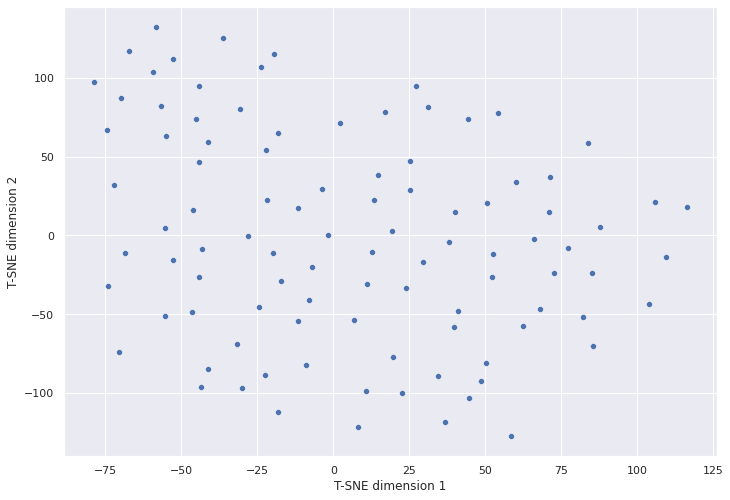

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full')
plt.xlabel(xlabel='T-SNE dimension 1')
plt.ylabel(ylabel='T-SNE dimension 2')

plt.show()